In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder 
import seaborn as sns

In [2]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

       	['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

       	['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

       	['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [3]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary,columns=te.columns_)
df.head()

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


<AxesSubplot:>

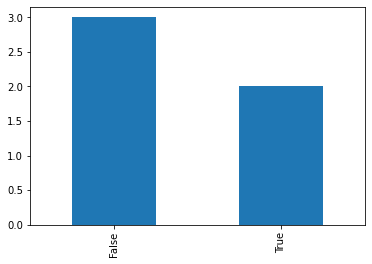

In [4]:

vc=df['Dress'].value_counts()
vc.head()
vc.plot.bar()

<AxesSubplot:>

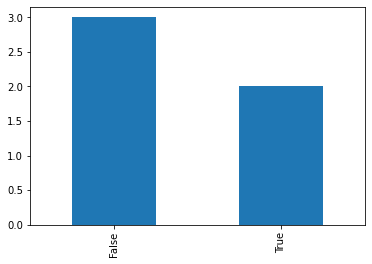

In [5]:


vc=df['Earrings'].value_counts()
vc.head()
vc.plot.bar()

<AxesSubplot:>

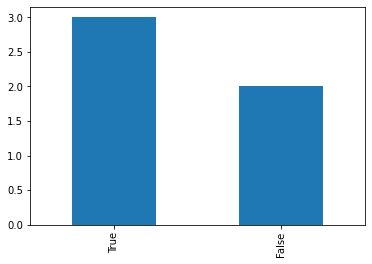

In [6]:


vc=df['Hat'].value_counts()
vc.head()
vc.plot.bar()

In [7]:
df2=df

In [8]:
df2['Hat']=df2['Hat'].map({False:'0',True:'1'})

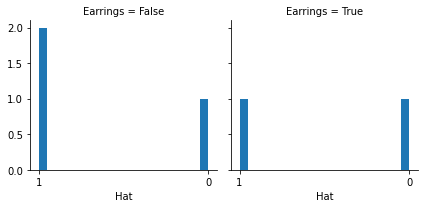

In [9]:
g = sns.FacetGrid(df2,col='Earrings')
g.map(plt.hist,'Hat',bins=20)

#on peut conclure que pour un client qui n'a pas  acheter 'Earings' il es plut probable qu'il va acheter des chapeaux

In [10]:
df2.head()

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,1,False,False,True,False,True,False,True,True,False
1,False,False,1,False,False,True,False,False,False,True,True,True
2,True,False,0,True,False,True,True,True,False,False,False,False
3,True,True,1,True,True,False,False,True,False,False,False,False
4,False,True,0,False,False,True,False,True,True,True,False,False


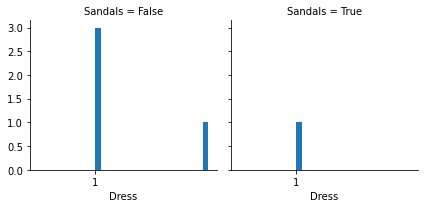

In [11]:
df2['Dress']=df2['Dress'].map({False:'0',True:'1'})
g = sns.FacetGrid(df2,col='Sandals')
g.map(plt.hist,'Dress',bins=20)

#on peut conclure que la majorité des clients lorsqu'il achete un sandals n'achte pas des robbes

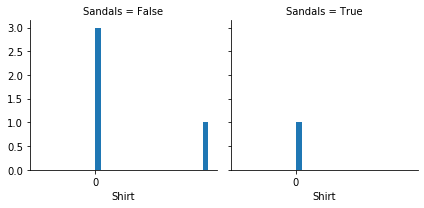

In [12]:
df2['Shirt']=df2['Shirt'].map({False:'0',True:'1'})
g = sns.FacetGrid(df2,col='Sandals')
g.map(plt.hist,'Shirt',bins=20)
#les client qui n'achette pas des shirt n'achette pas des sandals 

In [13]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary,columns=te.columns_)

In [14]:
from mlxtend.frequent_patterns import apriori

In [15]:
frequent_itemsets=apriori(df,min_support=0.6,use_colnames=True)

print(frequent_itemsets)

#les client achette plus des scarf et des pants qui sont souvent acheter a la fois par le meme client de meme pour (Skirt, Pants)    

   support        itemsets
0      0.6           (Hat)
1      0.8         (Pants)
2      0.8         (Scarf)
3      0.6         (Skirt)
4      0.6  (Pants, Scarf)
5      0.6  (Skirt, Pants)


In [16]:
df.head()

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [17]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets,min_threshold=0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


In [18]:
#il probable qu'un persone lorqu'il achette skirt il va achtter des pants et de meme pour l'inverse
#ce qui n'est pas le cas pour (Scarf,Pants)
#et on peut conclure aussi que les produit qui sont souvent achatter sont Scarf et pants ce qui prouve ce q'on a dejat dit 

In [19]:
association_rules(frequent_itemsets,metric='lift',min_threshold=1.00)

#les client sont souvent achte (Skirt,Pants) a la fois n'ont pas Skirt seullement 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.25,0.12,1.6


In [20]:
association_rules(frequent_itemsets,metric='confidence',min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


In [21]:
df=pd.read_csv("C:\\Users\Achraf\Downloads\Market_Basket_Optimisation.csv")
df.describe()
df.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [22]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.fillna(False, inplace = True)

In [24]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,chutney,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,turkey,avocado,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,mineral water,milk,energy bar,whole wheat rice,green tea,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,low fat yogurt,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
print(df.loc(0))

In [26]:
# Apriori

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Preprocessing
dataset = pd.read_csv('C:\\Users\Achraf\Downloads\Market_Basket_Optimisation.csv', header = None)
transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

# Training Apriori on the dataset
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

# Visualising the results
results = list(rules)

print(results)

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]), RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]), RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]), RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0.24

In [27]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
t=dataset.to_numpy()

In [29]:
print(t)

[['shrimp' 'almonds' 'avocado' ... 'frozen smoothie' 'spinach'
  'olive oil']
 ['burgers' 'meatballs' 'eggs' ... nan nan nan]
 ['chutney' nan nan ... nan nan nan]
 ...
 ['chicken' nan nan ... nan nan nan]
 ['escalope' 'green tea' nan ... nan nan nan]
 ['eggs' 'frozen smoothie' 'yogurt cake' ... nan nan nan]]


In [30]:
dataset.fillna(False, inplace = True)

In [31]:
t=dataset.to_numpy()

In [32]:
t

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., False, False, False],
       ['chutney', False, False, ..., False, False, False],
       ...,
       ['chicken', False, False, ..., False, False, False],
       ['escalope', 'green tea', False, ..., False, False, False],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., False, False,
        False]], dtype=object)

In [33]:
data=pd.DataFrame(results)

In [34]:
data

,items,support,ordered_statistics
0,"(light cream, chicken)",0.004533,"[((light cream), (chicken), 0.2905982905982905..."
1,"(mushroom cream sauce, escalope)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(pasta, escalope)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7..."
3,"(fromage blanc, honey)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(ground beef, herb & pepper)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."
...,...,...,...
155,"(ground beef, nan, mineral water, olive oil, s...",0.003066,"[((ground beef, olive oil), (nan, spaghetti, m..."
156,"(ground beef, nan, mineral water, pancakes, sp...",0.003066,"[((pancakes, ground beef), (nan, spaghetti, mi..."
157,"(ground beef, nan, mineral water, tomatoes, sp...",0.003066,"[((ground beef, tomatoes), (nan, spaghetti, mi..."
158,"(nan, mineral water, olive oil, spaghetti, milk)",0.003333,"[((mineral water, spaghetti, milk), (nan, oliv..."


In [35]:
data['ordered_statistics'][0]

[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]

In [50]:
confidence=[]
lift=[]


In [51]:
for i in range(0,160):
    confidence.append(data['ordered_statistics'][i][0][2])
    lift.append(data['ordered_statistics'][i][0][3])

In [57]:
confidence

[0.29059829059829057,
 0.3006993006993007,
 0.3728813559322034,
 0.2450980392156863,
 0.3234501347708895,
 0.3773584905660377,
 0.20512820512820515,
 0.2714932126696833,
 0.3220338983050847,
 0.41666666666666663,
 0.27999999999999997,
 0.27058823529411763,
 0.2823529411764706,
 0.2987012987012987,
 0.6764705882352942,
 0.40845070422535207,
 0.29059829059829057,
 0.24324324324324323,
 0.20155038759689922,
 0.23255813953488375,
 0.4411764705882354,
 0.3947368421052632,
 0.5714285714285714,
 0.2066666666666667,
 0.5283018867924528,
 0.3006993006993007,
 0.3728813559322034,
 0.23076923076923078,
 0.2450980392156863,
 0.2314814814814815,
 0.31100478468899523,
 0.20338983050847456,
 0.5,
 0.29523809523809524,
 0.30508474576271183,
 0.20574162679425836,
 0.21531100478468898,
 0.24000000000000002,
 0.23923444976076558,
 0.3225806451612903,
 0.2072072072072072,
 0.3913043478260869,
 0.39062500000000006,
 0.3234501347708895,
 0.3934426229508197,
 0.22424242424242427,
 0.4109589041095891,
 0.3773

In [53]:
lift[0]

4.84395061728395

In [54]:
confidence1[0]

0.29059829059829057

In [58]:
len(confidence)

160

In [59]:
len(lift)

160

In [62]:
data['confidence']=confidence
data['lift']=lift

In [63]:
data.drop('ordered_statistics',axis=1,inplace=True)

In [71]:
data

,items,support,confidence,lift
0,"(light cream, chicken)",0.004533,0.290598,4.843951
1,"(mushroom cream sauce, escalope)",0.005733,0.300699,3.790833
2,"(pasta, escalope)",0.005866,0.372881,4.700812
3,"(fromage blanc, honey)",0.003333,0.245098,5.164271
4,"(ground beef, herb & pepper)",0.015998,0.323450,3.291994
...,...,...,...,...
155,"(ground beef, nan, mineral water, olive oil, s...",0.003066,0.216981,3.632981
156,"(ground beef, nan, mineral water, pancakes, sp...",0.003066,0.211009,3.532991
157,"(ground beef, nan, mineral water, tomatoes, sp...",0.003066,0.261364,4.376091
158,"(nan, mineral water, olive oil, spaghetti, milk)",0.003333,0.211864,3.223519
